# Notebook error analysis 

## exception type distribution

In [1]:
import pandas as pd
import config

df_err_grouped_k = pd.read_excel(config.path_default.joinpath('data_dedup_cluster/df_err_processed_clustered_k.xlsx'))
df_err_grouped_g = pd.read_excel(config.path_default.joinpath('data_dedup_cluster/df_err_processed_clustered_g.xlsx'))

path_default=WindowsPath('C:/Users/yirwa29/Downloads/Dataset-Nb')


In [3]:
print((df_err_grouped_k.fname.nunique()))
print((df_err_grouped_k.eid.nunique()))
print((df_err_grouped_g.fname.nunique()))
print((df_err_grouped_g.eid.nunique()))

2689
3875
61342
88667


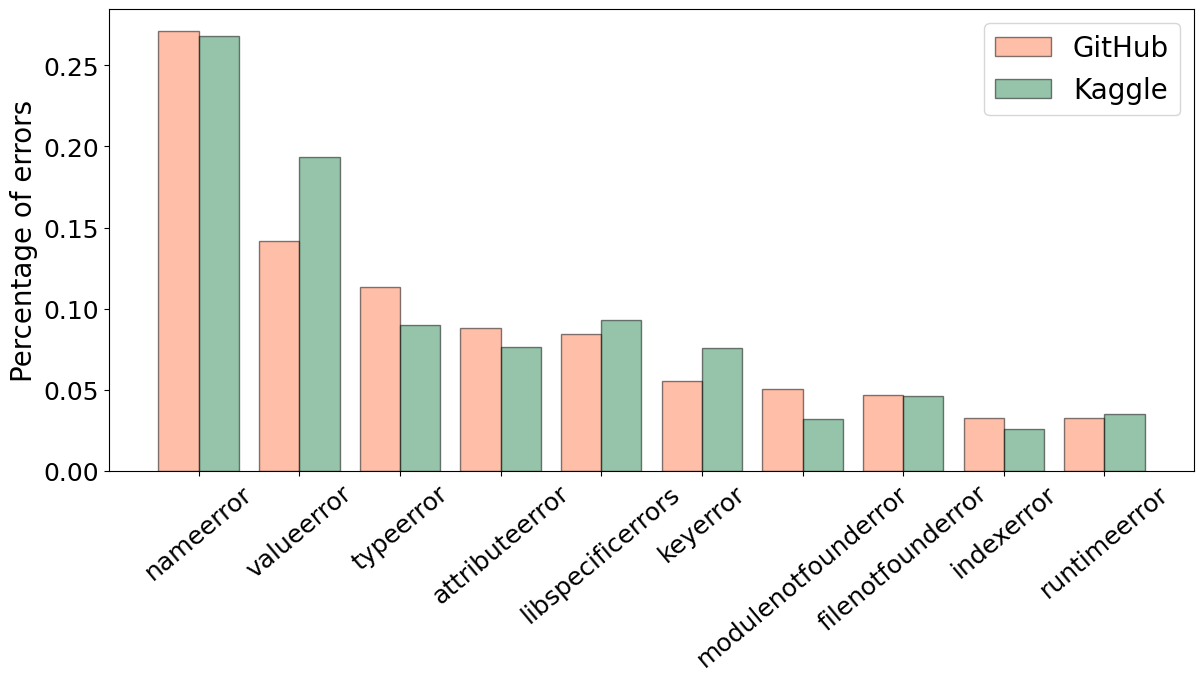

In [84]:
# https://matplotlib.org/stable/gallery/color/named_colors.html
import numpy as np  
import matplotlib.pyplot as plt  

g=(df_err_grouped_g["ename_mapped"].groupby([df_err_grouped_g["ename_mapped"]]).count().sort_values(ascending=0)/len(df_err_grouped_g))[:10]
k=(df_err_grouped_k["ename_mapped"].groupby([df_err_grouped_k["ename_mapped"]]).count().sort_values(ascending=0)/len(df_err_grouped_k))[:10]
gk = pd.concat([g, k], axis=1, keys=["GitHub","Kaggle"])

ind = np.arange(len(gk.index))

width = 0.4
fontsize = 20
plt.figure(figsize=(14,6))
plt.bar(ind - width / 2, gk.GitHub, width, label = 'GitHub', alpha = 0.5, color = 'coral', edgecolor = 'black') 
plt.bar(ind + width / 2, gk.Kaggle, width, label = 'Kaggle', alpha = 0.5, color = 'seagreen', edgecolor = 'black') 
  
plt.xticks(ind, gk.index, rotation=40, fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
# plt.xlabel("Exception types", fontsize=fontsize) 
plt.ylabel("Percentage of errors", fontsize=fontsize) 
plt.legend(fontsize=fontsize) 
plt.savefig(r"C:\Users\yirwa29\OneDrive - Linköpings universitet\SAProject\Paper2/exp_types.pdf", bbox_inches='tight')
plt.show()

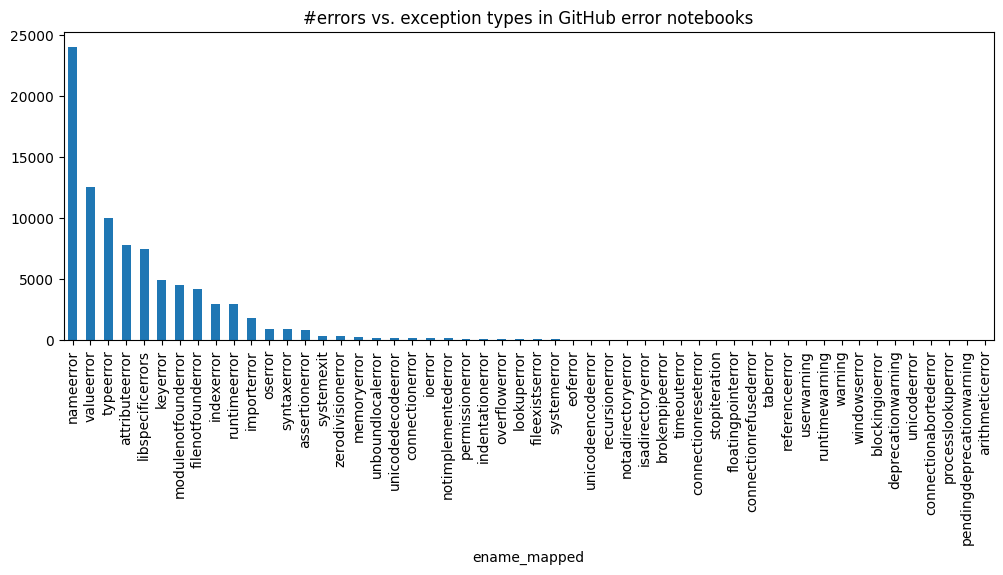

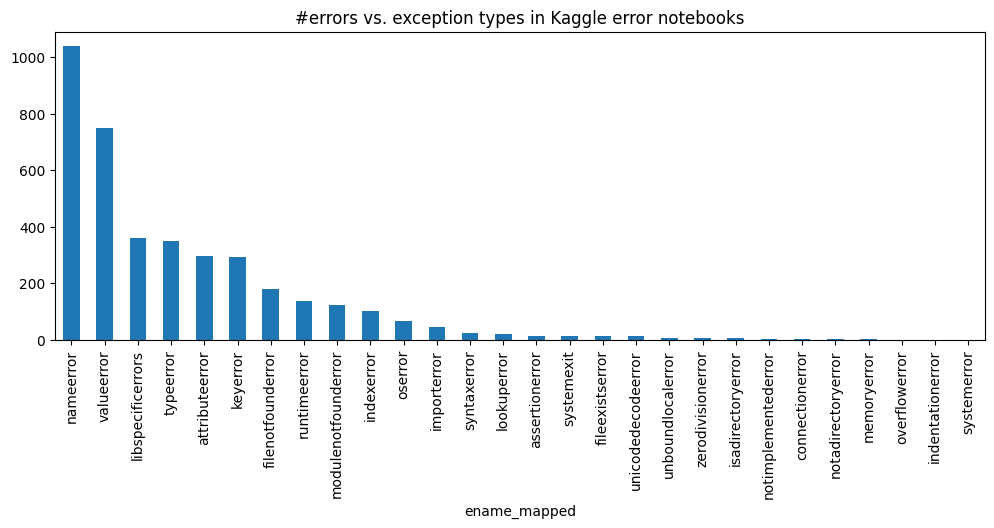

In [4]:
import util

util.visulize_exps(df_err_grouped_g, title="#errors vs. exception types in GitHub error notebooks")
util.visulize_exps(df_err_grouped_k, title="#errors vs. exception types in Kaggle error notebooks")